## Question : 

# Decision Tree Implementation
* This code works only when:-
  * The features of dataset are discrete
  * The last column of dataset must be the label or class (output)
  * Missing data is not allowed

In [1]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import pydotplus
from IPython.display import Image
import math
import operator

In [2]:
#Load Dataset
iris=datasets.load_iris()

In [3]:
# Column names are feature_names of the iris_dataset
df=pd.DataFrame(iris.data,columns=['sl','sw','pl','pw'])
df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# here i have converted continuous data to discrete values of 1 ,2 ,3, 4 in each column
#if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label 1
#if (m + Mean_Value) <=val < Mean_Value then it is assigned label 2
#if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label 3
#if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then it is assigned label 4

#Define a function label to return labels based on the values and boundaries
def label(val, *boundaries):
    if (val < boundaries[0]):
        return 1
    elif (val < boundaries[1]):
        return 2
    elif (val < boundaries[2]):
        return 3
    else:
        return 4

#Function to convert a continuous data into labelled data
#There are 4 lables  - 1,2,3,4
def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args= (first, second, third))

In [5]:
#Convert all columns to labelled data
df['sl_labeled'] = toLabel(df, 'sl')
df['sw_labeled'] = toLabel(df, 'sw')
df['pl_labeled'] = toLabel(df, 'pl')
df['pw_labeled'] = toLabel(df, 'pw')
df.head()

,sl,sw,pl,pw,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,5.1,3.5,1.4,0.2,2,3,1,1
1,4.9,3.0,1.4,0.2,1,2,1,1
2,4.7,3.2,1.3,0.2,1,3,1,1
3,4.6,3.1,1.5,0.2,1,3,1,1
4,5.0,3.6,1.4,0.2,1,3,1,1


In [6]:
#drop discrete value columns
df.drop(['sl','sw','pl','pw'],axis=1,inplace=True)
df.head()

,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,2,3,1,1
1,1,2,1,1
2,1,3,1,1
3,1,3,1,1
4,1,3,1,1


In [7]:
set(df['sl_labeled'])

{1, 2, 3, 4}

# Finding entropy

In [8]:
def entropy(y):
    total = len(y)
    entropy = 0
    
    for i in set(y['feature_type']):
        count_of_class = len(y[y['feature_type'] == i])  # counting occurence of 1 label in Y data 
        prob = count_of_class/total     # finding probability
        entropy += prob * math.log(prob, 2)  # adding it to total entropy
    entropy = -entropy
    return entropy

## Finding Information Gain

In [9]:
def find_info_gain(x, y, feature) :
    
    parent_entropy = entropy(y)  # calculating entropy of Y 
    total_ele = len(y)   # to get the count of number of labels present in Y data
    weighted_entropy = 0  # initiating weighted average = 0 
    
    val = set(x[feature])  # taking in account each unique label
    
    # iterating to get weighted entropies of each child and add them 
    for i in val :
        child = y[(x[feature] == i)]
        i_entropy = entropy(child)
        
        weighted_entropy += (i_entropy * len(child)) / total_ele
        
    #finding info gain
    info_gain = parent_entropy - weighted_entropy  
    return info_gain

## Splitting Info. Function

In [10]:
# finding split info these two will help us in calculating gain ratio 
def split_information(x, y, feature) :
    total_ele = len(y)
    weighted_avg = 0
    val = set(x[feature]) # unique values in each feature
    
    for i in val : # taking 1 child at a time 
        
        child = y[x[feature] == i] # taking values of Y where feature is i 
                
        weighted_avg += (len(child) / total_ele) * math.log((len(child) / total_ele), 2) ## calculating weighted average here
        
    return -1 * weighted_avg

## Best feature and maximum Gain

In [11]:
def find_best_feature(x, y , features) :
    best_feature = ''  # initiating best_feature as " "
    max_gain = -1  # initiating max_gain as -1
    
    # traversing all features
    for i in features :
        
        # finding split info and info_gain by calling these functions
        split_info = split_information(x, y, i)
        info_gain = find_info_gain(x, y, i)
        
        if split_info != 0 :
            gain_ratio = info_gain / split_info
            
        else :
            gain_ratio = -1
        
        # getting best feature and best gain ratio
        if gain_ratio > max_gain :
            best_feature = i
            max_gain = gain_ratio
            
    return best_feature, max_gain

## Main Function

In [12]:
def D_T(X,Y,features,level):     # this function is base function for Decision Tree 
    classes=set(Y['feature_type'])               # take all the unique labels present in Y 
    
    # now we will see all the cases and find out whether we can split our tree or not and whether the node is leaf or not 
    # case 1 
    if (len(classes) == 1):     # see if the length of classes is 1 or not 
        
            
        print("Level ",level)   # now we will print the current level as we don't have further classes we've reached the leaf node 
        current_class = list(classes)[0]    # current class will be our class at 0th position (although length is 1 but we are doing this to select the class) 
        
        print("Count of ",current_class," = ",len(Y))     # now we are printing the class and its count 
        print("Current Entropy is = 0.0")                 # Entropy is 0 as class will be pure and hence no randomness 
        print("Reached leaf Node")                        # we have only 1 class so we are at leaf node  
        print("Output Class Name =", current_class)
        print()
        return
   
    # case 2
    elif len(features)==0:                                 # checking if the count of features is 0 or not                           
        print("Level  ",level)                             # if feature is 0 that means we can't split further so we are just printing the level 
        
        #finding count of each output class
        for current_class in classes:
            count_of_current_class = (Y['feature_type'] == current_class).sum() 
            print("Count of ",current_class," = ",count_of_current_class) 
            
        #printing as we did in above case and it can be understood easily what we are doing 
        entropy_current = entropy(Y)
        
        print("Current Entropy is = ",entropy_current)
        print("No more features left")
        print("Reached leaf Node")
        print("Output Class Name =", current_class)
        print()
        return
    
    # case 3 when we don't have a leaf node and feature count is not 0 and count of classes is not 1 
    else:
        print("Level ",level)        # printing the current level 
        
        max_count = 0
        for i in classes:            # iterating over classes that is labels in Y 
            j = (Y['feature_type']==i).sum()         # taking sum of all the ith label in Y data that is calculating its count (in Y )
            print("Count of ",i," = ",j)       # printing the class and its count 
            
            if j >= max_count :
                max_count = j
                output_class  = i
                
        #entropy of Current Node
        print("Current Entropy is =",entropy(Y))
        
        #getting best feature to split and its gain ratio
        best_feature,gain_ratio = find_best_feature(X,Y,features)
        print("Splitting on feature ",best_feature,"with gain ratio :",gain_ratio)
        print("Output Class Name =", output_class)
        print()
        
        #splitting current node on all different values the best feature can have and recursively calling DT on each split
        diff_val_of_best_feat = set(X[best_feature]) # get different values of the BEST Feature in current data
        
        #traverse each feature value , split on each 
        for current in diff_val_of_best_feat:
            
            x=X[(X[best_feature] == current)]
            y=Y[(X[best_feature] == current)]

            # also we are deleting features when a split has been called on it 
            #recursion
            remaining_features = features - {best_feature}
            
            D_T(x,y,remaining_features,level+1)
        return

In [13]:
y = pd.DataFrame(iris.target,columns=['feature_type'])
y[y['feature_type'] == 0] = 'setosa'
y[y['feature_type'] == 1] = 'versicolor'
y[y['feature_type'] == 2] = 'virginica'
unused_features = set(df.columns)
D_T(df, y, unused_features, 0)

Level  0
Count of  versicolor  =  50
Count of  setosa  =  50
Count of  virginica  =  50
Current Entropy is = 1.584962500721156
Splitting on feature  pw_labeled with gain ratio : 0.699638203622209
Output Class Name = virginica

Level  1
Count of  setosa  =  50
Current Entropy is = 0.0
Reached leaf Node
Output Class Name = setosa

Level  1
Count of  versicolor  =  10
Current Entropy is = 0.0
Reached leaf Node
Output Class Name = versicolor

Level  1
Count of  versicolor  =  40
Count of  virginica  =  16
Current Entropy is = 0.863120568566631
Splitting on feature  pl_labeled with gain ratio : 0.4334099495621066
Output Class Name = versicolor

Level  2
Count of  versicolor  =  1
Current Entropy is = 0.0
Reached leaf Node
Output Class Name = versicolor

Level  2
Count of  versicolor  =  39
Count of  virginica  =  8
Current Entropy is = 0.6581912658132185
Splitting on feature  sl_labeled with gain ratio : 0.12674503775809332
Output Class Name = versicolor

Level  3
Count of  virginica  =  1


## Decision Tree Using Sklearn

In [14]:
#use above data
df.head()

,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,2,3,1,1
1,1,2,1,1
2,1,3,1,1
3,1,3,1,1
4,1,3,1,1


In [15]:
y.head()

,feature_type
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [16]:
df=pd.concat([df,y],axis=1)
df.head()

,sl_labeled,sw_labeled,pl_labeled,pw_labeled,feature_type
0,2,3,1,1,setosa
1,1,2,1,1,setosa
2,1,3,1,1,setosa
3,1,3,1,1,setosa
4,1,3,1,1,setosa


In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], random_state = 1)
clf = DecisionTreeClassifier()

In [18]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred=clf.predict(x_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype=object)

In [20]:
clf.score(x_test,y_test)

1.0

In [21]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

## **Visualising the data using Graphviz and Pydotplus**

In [22]:
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True)

In [23]:
graph = pydotplus.graph_from_dot_data(dot_data)

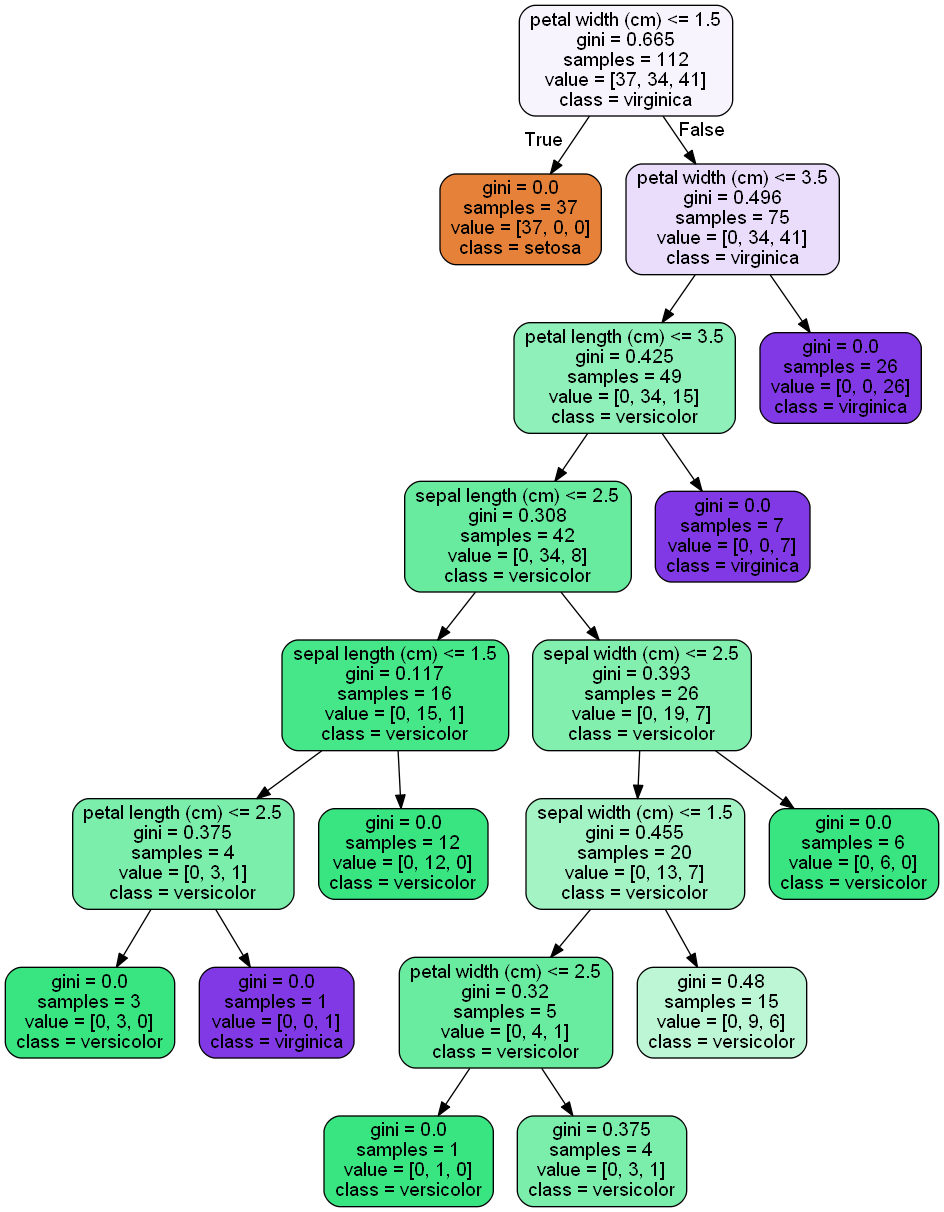

In [24]:
Image(graph.create_png())

In [25]:
#create a pdf for the graph
graph.write_pdf('iris.pdf')

True